# **PRAKTIKUM FUZZY LOGIC**



## **Getting started**
The code snippet introduces the basic implementation of a fuzzy membership function using Python. It begins by importing necessary libraries: `numpy` for handling arrays, `skfuzzy` from the `scikit-fuzzy` library for fuzzy logic operations, and `matplotlib.pyplot` for plotting graphs. The range `x` is defined as an array of integers from 0 to 10 using `np.arange()`. Then, a triangular membership function `mfx` is generated using `fuzz.trimf()`, which defines the membership curve with three points: 0, 5, and 10. The function gradually increases from 0 to 5, peaks at 5, and then decreases to 10. The values of `x` and the corresponding membership values `mfx` are printed to the console. Finally, the membership function is visualized with a plot showing the triangular shape, with a title set as "Fuzzy Membership Function." This introduces how fuzzy logic can represent degrees of truth or membership for different input values.

[ 0  1  2  3  4  5  6  7  8  9 10]
[0.  0.2 0.4 0.6 0.8 1.  0.8 0.6 0.4 0.2 0. ]


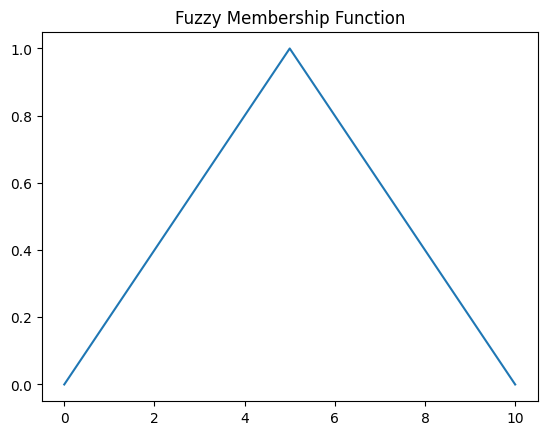

In [9]:
import numpy as np
import skfuzzy as fuzz
from matplotlib import pyplot as plt

# [0, 10]
x = np.arange(11)
mfx = fuzz.trimf(x, [0, 5, 10])

print(x)
print(mfx)

plt.title("Fuzzy Membership Function")
plt.plot(x, mfx)


## **Membership function**
In this section, we explore various types of fuzzy membership functions. A membership function in fuzzy logic maps input values to their degree of membership, representing how strongly they belong to a set. This code demonstrates different shapes of membership functions, including triangular, trapezoidal, sigmoid, S-function, Z-function, Pi-function, Gaussian, and generalized bell-shaped functions. Each type of function serves specific purposes based on how gradual or sharp the transitions between membership values need to be.

The code starts by defining the input range `x` from 0 to 10 with small steps of 0.25. This allows for more precise plotting of the membership functions. Various fuzzy membership functions are created:

1. **Triangular Membership Function (`trimf`)**: Defined by three points [0, 5, 10], it rises linearly from 0 to 5 and then decreases back to 0 by 10.
2. **Trapezoidal Membership Function (`trapmf`)**: Defined by four points [0, 2, 8, 10], it has a flat region between 2 and 8, representing full membership, with linear transitions on both sides.
3. **Sigmoid Membership Function (`sigmf`)**: A smooth, S-shaped curve controlled by the center (5.0) and width (2.0), useful for representing gradual changes.
4. **S-function (`smf`)**: Similar to the sigmoid, but defined by two points (1.0, 9.0), it increases smoothly from 1 to 9.
5. **Z-function (`zmf`)**: The inverse of the S-function, this function starts with full membership and decreases smoothly to 0.
6. **Pi-function (`pimf`)**: A bell-shaped function defined by four points (0.0, 4.0, 5.0, 10.0), with smooth transitions on both sides.
7. **Gaussian Membership Function (`gaussmf`)**: A symmetric, smooth curve controlled by the mean (5.0) and standard deviation (1.25).
8. **Generalized Bell-Shaped Function (`gbellmf`)**: Controlled by the width, slope, and center, this is a flexible bell-shaped function often used in control systems.

The code generates three subplots:
- The first subplot compares the triangular and trapezoidal functions.
- The second shows the sigmoid, S-function, Z-function, and Pi-function.
- The third compares the Gaussian and generalized bell-shaped functions.

[ 0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75
  3.    3.25  3.5   3.75  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75
  6.    6.25  6.5   6.75  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75
  9.    9.25  9.5   9.75 10.  ]


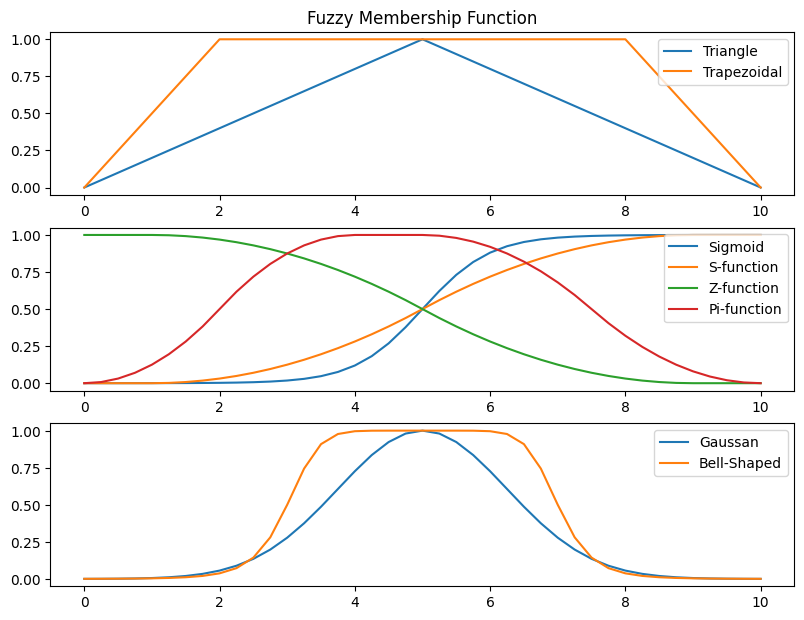

In [10]:
import numpy as np
import skfuzzy as fuzz
from matplotlib import pyplot as plt

# [0, 10]
start = 0
stop = 10 + 0.001
step = 0.25
x = np.arange(start, stop, step)
print(x)

# Triangular membership function
trimf = fuzz.trimf(x, [0, 5, 10])

# Trapezoidal membership function
trapmf = fuzz.trapmf(x, [0, 2, 8, 10])

# Sigmoid membership function
center = 5.0
width_control = 2.0
sigmf = fuzz.sigmf(x, center, width_control)

# S-function
foot = 1.0
ceiling = 9.0
smf = fuzz.smf(x, foot, ceiling)

# Z-function
zmf = fuzz.zmf(x, foot, ceiling)

# Pi-function
pimf = fuzz.pimf(x, 0.0, 4.0, 5.0, 10.0)

# Gaussian function
mean = 5.0
sigma = 1.25
gaussmf = fuzz.gaussmf(x, mean, sigma)

# Generalized Bell-Shaped function
width = 2.0
slope = 4.0
center = 5.0
gbellmf = fuzz.gbellmf(x, width, slope, center)

fig_scale = 1.5
plt.figure(figsize=(6.4 * fig_scale, 4.8 * fig_scale))

# 3 rows, 1 col, index from 1
plt.subplot(311)
plt.title("Fuzzy Membership Function")
plt.plot(x, trimf, label="Triangle")
plt.plot(x, trapmf, label="Trapezoidal")
plt.legend(loc="upper right")

plt.subplot(312)
plt.plot(x, sigmf, label="Sigmoid")
plt.plot(x, smf, label="S-function")
plt.plot(x, zmf, label="Z-function")
plt.plot(x, pimf, label="Pi-function")
plt.legend(loc="upper right")

plt.subplot(313)
plt.plot(x, gaussmf, label="Gaussan")
plt.plot(x, gbellmf, label="Bell-Shaped")
plt.legend(loc="upper right")



### **Fuzzy logic**

In this section, the code demonstrates the basic operations in fuzzy logic, including fuzzy negation (NOT), fuzzy conjunction (AND), and fuzzy disjunction (OR). Fuzzy logic extends classical logic by introducing degrees of truth, allowing for partial membership rather than binary true or false values.

The code begins by defining two membership functions: a **triangular membership function** (`trimf`) over the range [0, 5] and a **trapezoidal membership function** (`trapmf`) over the range [4, 10]. These represent two fuzzy sets, which can overlap or interact in fuzzy logic operations.

Next, the code applies the following fuzzy logic operations:
1. **Fuzzy NOT**: The `fuzz.fuzzy_not()` function computes the complement (negation) of the triangular and trapezoidal membership functions. This operation inverts the membership values, so high membership becomes low and vice versa.
2. **Fuzzy AND**: The `fuzz.fuzzy_and()` function calculates the intersection of the two fuzzy sets, returning the minimum value at each point. This represents the logical conjunction where both membership functions overlap.
3. **Fuzzy OR**: The `fuzz.fuzzy_or()` function computes the union of the two fuzzy sets, returning the maximum value at each point. This operation represents the logical disjunction, where a high membership in either set leads to a high overall membership.

The results of these operations are visualized in three subplots:
- The first subplot shows the original triangular and trapezoidal membership functions.
- The second subplot displays their fuzzy NOT counterparts, showing the inverse membership values.
- The third subplot presents the results of the fuzzy AND and OR operations, illustrating how the two fuzzy sets combine under these logical operations.

[ 4.   4.5  5.   5.5  6.   6.5  7.   7.5  8.   8.5  9.   9.5 10. ]
[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10. ]


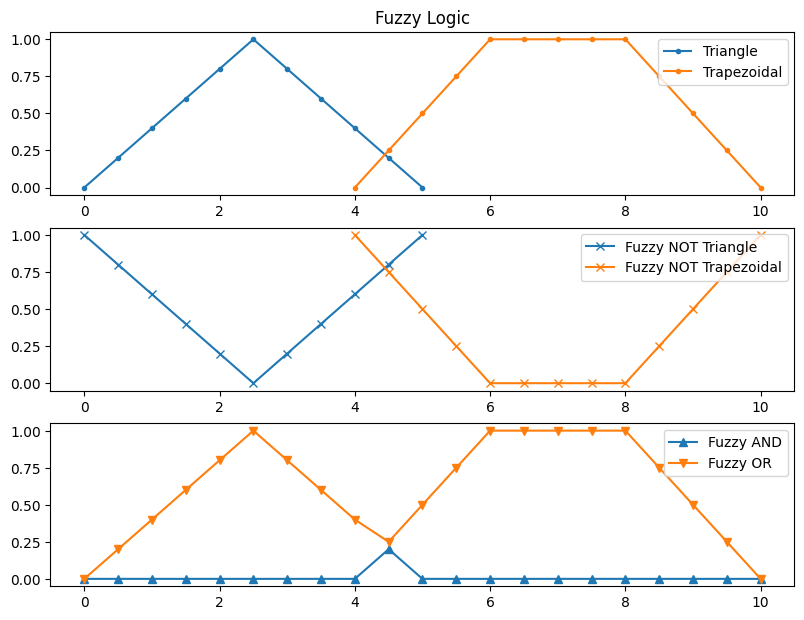

In [11]:
import numpy as np
import skfuzzy as fuzz
from matplotlib import pyplot as plt

# [0, 10]
delta = 0.001
start = 0
stop = 10 + delta
step = 0.5
x = np.arange(start, stop + delta, step)

# Triangular membership function
x1 = np.arange(0, 5 + delta, step)
trimf = fuzz.trimf(x1, [0, 2.5, 5])

# Trapezoidal membership function
x2 = np.arange(4, 10 + delta, step)
trapmf = fuzz.trapmf(x2, [4, 6, 8, 10])

# fuzzy logic
tri_not = fuzz.fuzzy_not(trimf)
trap_not = fuzz.fuzzy_not(trapmf)
x3, tri_trap_and = fuzz.fuzzy_and(x1, trimf, x2, trapmf)
x3, tri_trap_or = fuzz.fuzzy_or(x1, trimf, x2, trapmf)
print(x2)
print(x3)

# Whole config
fig_scale = 1.5
plt.figure(figsize=(6.4 * fig_scale, 4.8 * fig_scale))
row = 3
col = 1

plt.subplot(row, col, 1)
plt.title("Fuzzy Logic")
plt.plot(x1, trimf, label="Triangle", marker=".")
plt.plot(x2, trapmf, label="Trapezoidal", marker=".")
plt.legend(loc="upper right")

plt.subplot(row, col, 2)
plt.plot(x1, tri_not, label="Fuzzy NOT Triangle", marker="x")
plt.plot(x2, trap_not, label="Fuzzy NOT Trapezoidal", marker="x")
plt.legend(loc="upper right")

plt.subplot(row, col, 3)
plt.plot(x3, tri_trap_and, label="Fuzzy AND", marker="^")
plt.plot(x3, tri_trap_or, label="Fuzzy OR", marker="v")
plt.legend(loc="upper right")

### **Defuzzification**

In this section, the code introduces **defuzzification**, the process of converting a fuzzy set into a crisp (definite) value. In fuzzy logic systems, defuzzification is necessary after applying fuzzy operations to derive a specific output from the fuzzy results.

The code first defines two membership functions, a **triangular membership function** (`trimf`) and a **trapezoidal membership function** (`trapmf`), and performs fuzzy operations (`NOT`, `AND`, `OR`) as in previous examples. The focus then shifts to defuzzifying the resulting fuzzy set from the OR operation (`tri_trap_or`) using several common methods.

Here are the defuzzification methods applied:
1. **Centroid**: Also known as the center of gravity, this method finds the point where the fuzzy set balances, acting as the "average" point of the fuzzy values.
   - `centroid_x` represents the x-coordinate of the centroid, and `centroid_y` is the membership value at that point.
2. **Bisector**: This method splits the fuzzy set into two equal areas, finding the point that equally divides the fuzzy set.
   - `bisector_x` represents the x-coordinate of the bisector, and `bisector_y` is the membership value at that point.
3. **Mean of Maximum (MOM)**: This method takes the average of the points that have the highest membership value.
   - `mom_x` is the x-coordinate of the mean of maximum values, and `mom_y` is the membership value at that point.
4. **Smallest of Maximum (SOM)**: This method selects the smallest x-value that has the maximum membership value.
   - `som_x` is the smallest x-value, and `som_y` is the membership value at that point.
5. **Largest of Maximum (LOM)**: This method chooses the largest x-value that has the maximum membership value.
   - `lom_x` is the largest x-value, and `lom_y` is the membership value at that point.

The results of defuzzification are visualized in three subplots:
- The first subplot shows the original triangular and trapezoidal membership functions.
- The second subplot presents the results of the fuzzy NOT, AND, and OR operations.
- The third subplot focuses on the fuzzy OR operation (`tri_trap_or`) and displays vertical lines marking the results of each defuzzification method: centroid (red), bisector (blue), MOM (green), SOM (cyan), and LOM (magenta).

This visualization demonstrates how different defuzzification methods lead to varying crisp outputs, depending on the method chosen. Each method has its advantages and is selected based on the specific requirements of the system, such as precision, speed, or interpretability. The plot is a clear illustration of how fuzzy values are translated into a single, concrete value that can be used for decision-making or control.

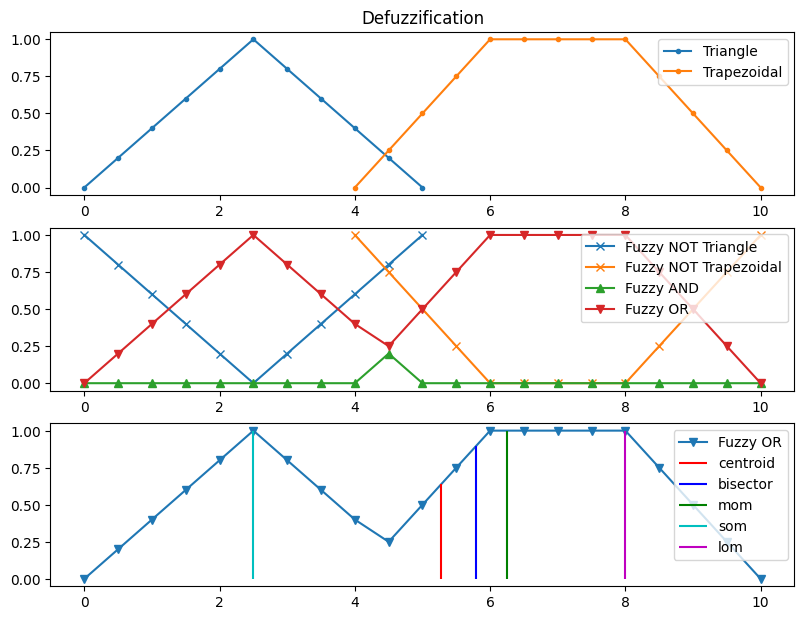

In [12]:
import numpy as np
import skfuzzy as fuzz
from matplotlib import pyplot as plt

# [0, 10]
delta = 0.001
start = 0
stop = 10 + delta
step = 0.5
x = np.arange(start, stop + delta, step)

# Triangular membership function
x1 = np.arange(0, 5 + delta, step)
trimf = fuzz.trimf(x1, [0, 2.5, 5])

# Trapezoidal membership function
x2 = np.arange(4, 10 + delta, step)
trapmf = fuzz.trapmf(x2, [4, 6, 8, 10])

# fuzzy logic
tri_not = fuzz.fuzzy_not(trimf)
trap_not = fuzz.fuzzy_not(trapmf)
x3, tri_trap_and = fuzz.fuzzy_and(x1, trimf, x2, trapmf)
x3, tri_trap_or = fuzz.fuzzy_or(x1, trimf, x2, trapmf)

# Defuzzify
centroid_x = fuzz.defuzz(x3, tri_trap_or, "centroid")
centroid_y = fuzz.interp_membership(x3, tri_trap_or, centroid_x)
bisector_x = fuzz.defuzz(x3, tri_trap_or, "bisector")
bisector_y = fuzz.interp_membership(x3, tri_trap_or, bisector_x)
mom_x = fuzz.defuzz(x3, tri_trap_or, "mom")
mom_y = fuzz.interp_membership(x3, tri_trap_or, mom_x)
som_x = fuzz.defuzz(x3, tri_trap_or, "som")
som_y = fuzz.interp_membership(x3, tri_trap_or, som_x)
lom_x = fuzz.defuzz(x3, tri_trap_or, "lom")
lom_y = fuzz.interp_membership(x3, tri_trap_or, lom_x)

# Whole config
fig_scale = 1.5
plt.figure(figsize=(6.4 * fig_scale, 4.8 * fig_scale))
row = 3
col = 1

plt.subplot(row, col, 1)
plt.title("Defuzzification")
plt.plot(x1, trimf, label="Triangle", marker=".")
plt.plot(x2, trapmf, label="Trapezoidal", marker=".")
plt.legend(loc="upper right")

plt.subplot(row, col, 2)
plt.plot(x1, tri_not, label="Fuzzy NOT Triangle", marker="x")
plt.plot(x2, trap_not, label="Fuzzy NOT Trapezoidal", marker="x")
plt.plot(x3, tri_trap_and, label="Fuzzy AND", marker="^")
plt.plot(x3, tri_trap_or, label="Fuzzy OR", marker="v")
plt.legend(loc="upper right")

plt.subplot(row, col, 3)
plt.plot(x3, tri_trap_or, label="Fuzzy OR", marker="v")
plt.vlines(centroid_x, 0.0, centroid_y, label="centroid", color="r")
plt.vlines(bisector_x, 0.0, bisector_y, label="bisector", color="b")
plt.vlines(mom_x, 0.0, mom_y, label="mom", color="g")
plt.vlines(som_x, 0.0, som_y, label="som", color="c")
plt.vlines(lom_x, 0.0, lom_y, label="lom", color="m")
plt.legend(loc="upper right")


## **The Tipping Problem**
The ‘tipping problem’ is commonly used to illustrate the power of fuzzy logic principles to generate complex behavior from a compact, intuitive set of expert rules.

### **Input variables**
A number of variables play into the decision about how much to tip while dining. Consider two of them:
*   `Quality`: Quality of the food
*   `Service`: Quality of the service

### **Output variable**
The output variable is simply the tip amount, in percentage points:
*   Tip: Percent of bill to add as tip

For the purposes of discussion, let’s say we need ‘high’, ‘medium’, and ‘low’ membership functions for both input variables and our output variable. These are defined in scikit-fuzzy as follows

## **Source code:**

*   Install fuzzy library `scikit-fuzzy` the following comment

  `!pip install scikit-fuzzy`



*   Import some libraries:





In [ ]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.4 MB/s eta 0:00:00




*   Generate universe variables



In [ ]:
# Generate universe variables
#   * Quality and service on subjective ranges [0, 10]
#   * Tip has a range of [0, 25] in units of percentage points
x_qual = np.arange(0, 11, 1)
x_serv = np.arange(0, 11, 1)
x_tip  = np.arange(0, 26, 1)



*   Generate fuzzy membership functions



In [ ]:
qual_lo = fuzz.trimf(x_qual, [0, 0, 5])
qual_md = fuzz.trimf(x_qual, [0, 5, 10])
qual_hi = fuzz.trimf(x_qual, [5, 10, 10])
serv_lo = fuzz.trimf(x_serv, [0, 0, 5])
serv_md = fuzz.trimf(x_serv, [0, 5, 10])
serv_hi = fuzz.trimf(x_serv, [5, 10, 10])
tip_lo = fuzz.trimf(x_tip, [0, 0, 13])
tip_md = fuzz.trimf(x_tip, [0, 13, 25])
tip_hi = fuzz.trimf(x_tip, [13, 25, 25])



*   Visualize these universes and membership functions



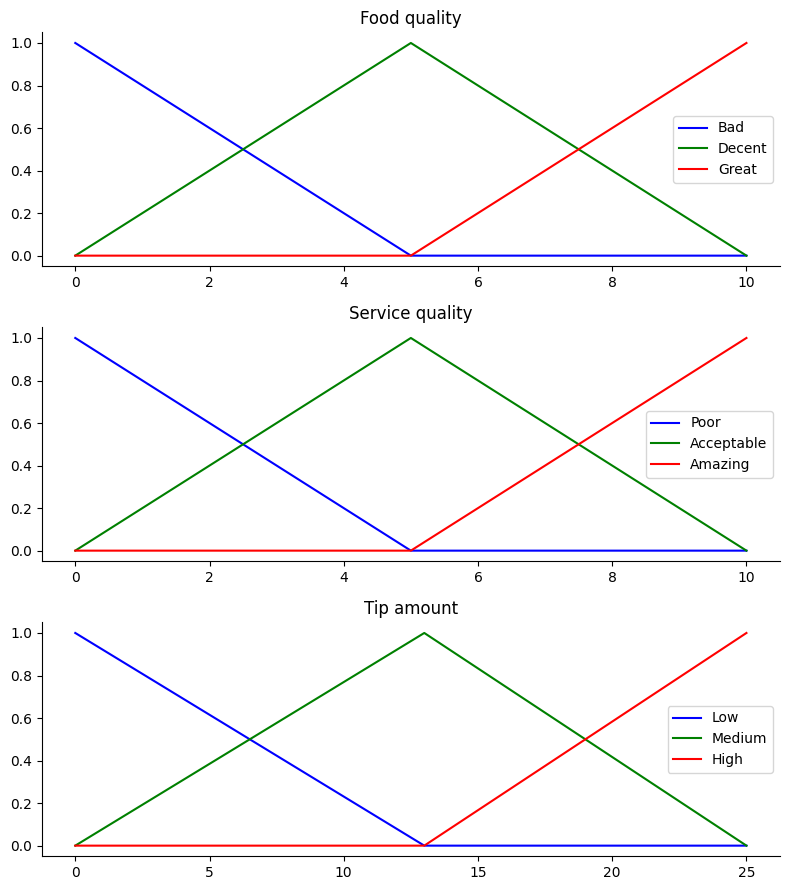

In [ ]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_qual, qual_lo, 'b', linewidth=1.5, label='Bad')
ax0.plot(x_qual, qual_md, 'g', linewidth=1.5, label='Decent')
ax0.plot(x_qual, qual_hi, 'r', linewidth=1.5, label='Great')
ax0.set_title('Food quality')
ax0.legend()

ax1.plot(x_serv, serv_lo, 'b', linewidth=1.5, label='Poor')
ax1.plot(x_serv, serv_md, 'g', linewidth=1.5, label='Acceptable')
ax1.plot(x_serv, serv_hi, 'r', linewidth=1.5, label='Amazing')
ax1.set_title('Service quality')
ax1.legend()

ax2.plot(x_tip, tip_lo, 'b', linewidth=1.5, label='Low')
ax2.plot(x_tip, tip_md, 'g', linewidth=1.5, label='Medium')
ax2.plot(x_tip, tip_hi, 'r', linewidth=1.5, label='High')
ax2.set_title('Tip amount')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

## **Fuzzy rules**
Now, to make these triangles useful, we define the fuzzy relationship between input and output variables. For the purposes of our example, consider three simple rules:

1.   If the food is bad OR the service is poor, then the tip will be low
2.   If the service is acceptable, then the tip will be medium
3.   If the food is great OR the service is amazing, then the tip will be high.

Most people would agree on these rules, but the rules are fuzzy. Mapping the imprecise rules into a defined, actionable tip is a challenge. This is the kind of task at which fuzzy logic excels.

## **Rule application**
What would the tip be in the following circumstance:

Food quality was 6.5
Service was 9.8

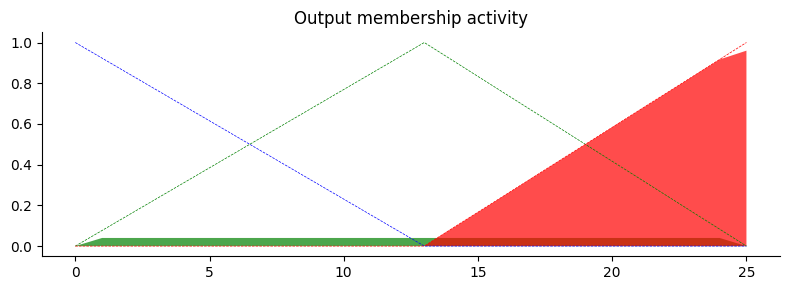

In [ ]:
# We need the activation of our fuzzy membership functions at these values.
# The exact values 6.5 and 9.8 do not exist on our universes...
# This is what fuzz.interp_membership exists for!
qual_level_lo = fuzz.interp_membership(x_qual, qual_lo, 6.5)
qual_level_md = fuzz.interp_membership(x_qual, qual_md, 6.5)
qual_level_hi = fuzz.interp_membership(x_qual, qual_hi, 6.5)

serv_level_lo = fuzz.interp_membership(x_serv, serv_lo, 9.8)
serv_level_md = fuzz.interp_membership(x_serv, serv_md, 9.8)
serv_level_hi = fuzz.interp_membership(x_serv, serv_hi, 9.8)

# Now we take our rules and apply them. Rule 1 concerns bad food OR service.
# The OR operator means we take the maximum of these two.
active_rule1 = np.fmax(qual_level_lo, serv_level_lo)

# Now we apply this by clipping the top off the corresponding output
# membership function with `np.fmin`
tip_activation_lo = np.fmin(active_rule1, tip_lo)  # removed entirely to 0

# For rule 2 we connect acceptable service to medium tipping
tip_activation_md = np.fmin(serv_level_md, tip_md)

# For rule 3 we connect high service OR high food with high tipping
active_rule3 = np.fmax(qual_level_hi, serv_level_hi)
tip_activation_hi = np.fmin(active_rule3, tip_hi)
tip0 = np.zeros_like(x_tip)

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_tip, tip0, tip_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_tip, tip0, tip_activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, tip_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

## **Rule aggregation**
With the activity of each output membership function known, all output membership functions must be combined. This is typically done using a maximum operator. This step is also known as aggregation.

## **Defuzzification**
Finally, to get a real world answer, we return to crisp logic from the world of fuzzy membership functions. For the purposes of this example the centroid method will be used.

## **The result is a tip of 20.2%.**

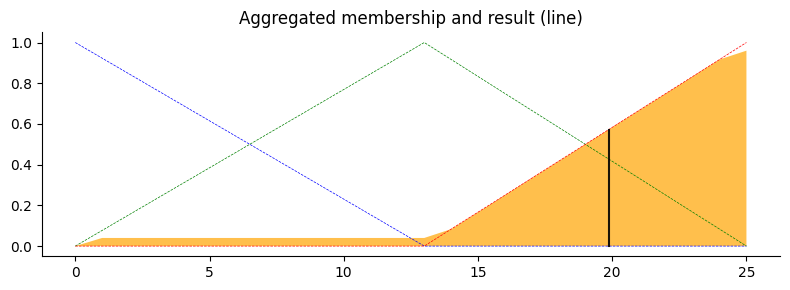

In [6]:
# Aggregate all three output membership functions together
aggregated = np.fmax(tip_activation_lo,
                     np.fmax(tip_activation_md, tip_activation_hi))

# Calculate defuzzified result
tip = fuzz.defuzz(x_tip, aggregated, 'centroid')
tip_activation = fuzz.interp_membership(x_tip, aggregated, tip)  # for plot

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([tip, tip], [0, tip_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

## **Final thoughts**

The power of fuzzy systems is allowing complicated, intuitive behavior based on a sparse system of rules with minimal overhead. Note our membership function universes were coarse, only defined at the integers, but `fuzz.interp_membership `allowed the effective resolution to increase on demand. This system can respond to arbitrarily small changes in inputs, and the processing burden is minimal.

## **References:**


*   https://github.com/caigen/scikit-fuzzy-examples/tree/master
*   https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem.html


